# CONTACT MATRIX TUTORIAL

## Preliminaries

In [177]:
import os 
import sys

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath('../src/')
if module_path not in sys.path:
    sys.path.append(module_path)

import utils as ut
import plots as pt

plt.rcParams.update({'font.size': 15})
plt.rc('axes', labelsize=20)
plt.rcParams['xtick.labelsize'] = 20
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

path_cwd = os.getcwd()
print(path_cwd)

/Users/alfonso/workshop/contact/notebooks


Let's import the overall contact matrix and the population (85 age group resolution) from our local directory in this project. 

In [178]:
id_state = 'California'
path_source = os.path.join(path_cwd, '..')

contact = ut.import_contact_matrix(id_state=id_state, path=path_source)

id_state = 'California'
population = ut.import_age_distribution(id_state=id_state, path=path_source)

## Contact matrix

Contact matrices in this project have been downloaded from Mistry et al. [https://github.com/mobs-lab/mixing-patterns/tree/main/data]. These matrices come from synthetic populations ultimately built with census and surveys data from 2005. Matrices are offered for different settings:
- Community
- Households
- Workplaces
- Schools
And an overall setting which is weighted linear combination of these. Details about all this stuff can be found within the repo and in their publication [https://www.nature.com/articles/s41467-020-20544-y].

For now, suffices to say that an element $M_{ij}$ of the contact matrix **M** represents the per capita average number of contacts between age group $i$ and age group $j$.

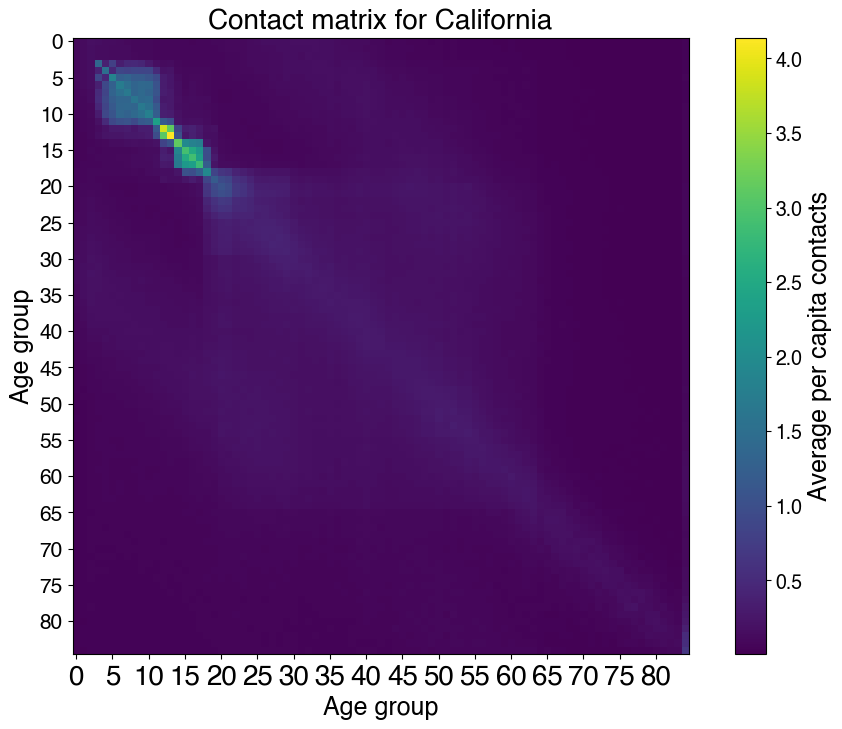

In [179]:
flag_log = False 

pt.plot_contact(contact, id_state=id_state, flag_log=flag_log)

We can appreciate how the largest elements of this matrix lie along the matrix diagonal or very close to it. 

In [180]:
max_value = np.max(contact)

max_index = np.unravel_index(np.argmax(contact), contact.shape)

print("Age group {0} interacting with age group {1} has the highest per capita average number of contacts equal to {2}".format(max_index[0], max_index[1], max_value))

Age group 13 interacting with age group 13 has the highest per capita average number of contacts equal to 4.138663200437235


### Symmetry

As these matrices are presented as a per capita number of contacts, we should not expect that $M_{ij}=M_{ji}$ for $i\neq j$:

In [181]:
contact == contact.T

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

However, what it surely must hold, assuming reciprocity of contacts (which is something to be expected), is that:
$M_{ij}N_i=M_{ji}N_j$, where $N_i$ represents the population of age group $i$.

In [182]:
ut.check_symmetry_condition(contact, population)

True

Alright!

### Number of contacts

Multiplying the contact matrix row-wise by the population of each age group and adding up over all the contactees groups, corresponginly, we get the total number of contacts performed by every age group.

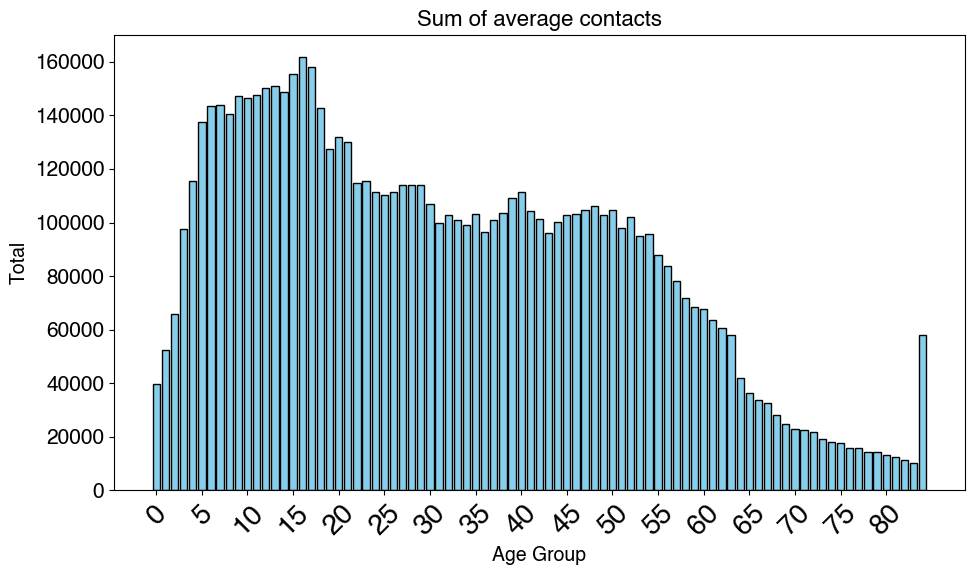

In [183]:
ncontacts_age = contact * population[:, np.newaxis] 

pt.plot_total_group_average_contacts(ncontacts_age)

We can obtain the average number of contacts per age group just by dividing this number of contacts per age group by the total population in the corresponding age group:

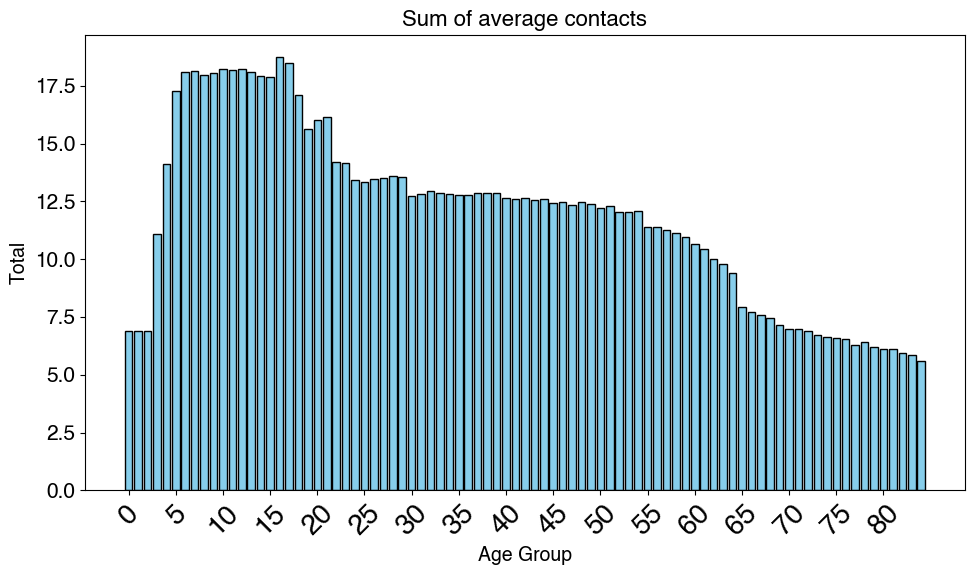

In [184]:
average_contacts_age = ncontacts_age / population[:, np.newaxis]

pt.plot_total_group_average_contacts(average_contacts_age)

Finally, we can get the system's average number of contacts by adding up the total number of contacts performed by each age group and dividing by the total population:

In [185]:
print(np.sum(ncontacts_age) / np.sum(population))

12.824570382250412


### Epidemiological quantities

The spectral radius of the contact matrix is related to the system's connectivity.

In [186]:
max_eigenvalue = np.max(np.linalg.eigvals(contact))
print(max_eigenvalue)

14.384944251347191


In a homogeneous system, the maximum eigenvalue of the contact matrix would be equal to the average degree of the system, here we appreciate a slight discrepance showing the system's heterogeneity.

Epidemiologically, there is a relationship between this maximum eigenvalue and the basic reproduction number $R_0$ (or the disease's transmission rate for the matter):

In [187]:
R0 = 1.2
decay_rate = 0.1
transmission_rate = R0 * decay_rate / max_eigenvalue

print(transmission_rate)

0.0083420552699578


Relatedly, the per capita force of infection experienced by the susceptible population of a certain group of the population is given by $\lambda_g=\sum_{g'}M_{gg'}\frac{I_g}{N_g}$. This quantity depends on the number of infected individuals at each population group. This quantity is a dynamical variable that depends on the specific dynamics of the epidemiological model so it cannot be precisely computed here. However, we can have at least a guess or an estimate for a controlled situation. 

We can assume we are computing the force of infection for a specific population at the beginning of an epidemic, and thus assuming a very low number of infected individuals. We are going to assume that initially, even though unrealistically, it is equally shared across all the age groups in the population, so that all fractios $I_g/N_g$ are exactly the same.

In [188]:
infected_fraction = 0.0001
infected_fraction_group = np.full(len(contact), infected_fraction)

To put it in perspective, this would be equal to having this total number of infected individuals in the whole population:

In [189]:
np.sum(infected_fraction_group * population)

np.float64(57.83120000000001)

Which yields a per capita and group force of infection of:

In [190]:
foi_group = np.sum(contact * infected_fraction_group[:, np.newaxis], axis=1)
print(foi_group)

[0.00068971 0.00068971 0.00068971 0.00110761 0.0014107  0.0017287
 0.00181109 0.00181601 0.00179567 0.00180562 0.00182429 0.00181693
 0.00182334 0.00180908 0.00179055 0.00178904 0.00187652 0.00184898
 0.00170967 0.00156286 0.00160288 0.00161397 0.00142238 0.00141799
 0.0013433  0.0013355  0.00134817 0.00134918 0.00135835 0.00135516
 0.00127474 0.00128308 0.00129441 0.00128467 0.00128268 0.00127648
 0.00127633 0.00128743 0.00128623 0.00128731 0.00126402 0.00126241
 0.00126418 0.00125785 0.00126191 0.00124249 0.00124645 0.001236
 0.00124631 0.00123973 0.00122092 0.00123124 0.00120361 0.00120551
 0.00120632 0.00114004 0.00114114 0.00112464 0.00111109 0.00109758
 0.00106446 0.00104596 0.00100079 0.00097788 0.0009399  0.00079236
 0.00077346 0.00076021 0.00074348 0.00071711 0.0006982  0.0006992
 0.00069152 0.00067334 0.00066503 0.00065819 0.00065426 0.00063078
 0.00064238 0.00062031 0.00061046 0.00061233 0.00059346 0.00058573
 0.00056072]


The average per-capita force of infection over all population groups is then:

In [191]:
print(np.mean(foi_group))

0.0011881291336700794


Now imagine that instead of fixing the group infection-to-population fractions, we just bring absolute numbers like, for instance, 1 infected individual per population group:


In [192]:
infected_number = 1
infected_population_group = np.full(len(contact), infected_number)
infected_fraction_group = infected_population_group / population

In [193]:
foi_group = np.sum(contact * infected_fraction_group[:, np.newaxis], axis=1)
print(foi_group)

[0.0011943  0.00090775 0.00072229 0.00125708 0.00172099 0.00217391
 0.00228846 0.00229149 0.00229742 0.00221576 0.00227326 0.00223457
 0.00221333 0.00216709 0.00215703 0.00205944 0.00217391 0.00216104
 0.00204555 0.00191833 0.00194571 0.00200468 0.00176386 0.0017403
 0.00162155 0.00161488 0.00163078 0.00159875 0.00161998 0.00160869
 0.00151972 0.00165133 0.00163003 0.00163715 0.00165892 0.00158039
 0.00169028 0.00163962 0.00159681 0.00151895 0.00143557 0.00152575
 0.00157924 0.00164705 0.00158911 0.00150331 0.00150701 0.00146134
 0.00146126 0.00149383 0.00142365 0.00154853 0.00141969 0.00153022
 0.00152064 0.00148095 0.00155278 0.00161679 0.00171756 0.00176375
 0.00167657 0.0017161  0.00165147 0.00164709 0.00210881 0.00173005
 0.00177766 0.00176916 0.00196118 0.00207919 0.00211897 0.00216337
 0.00219253 0.00237427 0.00244226 0.00243325 0.00272835 0.00253225
 0.00290802 0.00271352 0.00281188 0.00300605 0.00309092 0.00329618
 0.00054176]


Now, the average force of infection is:

In [194]:
print(np.mean(foi_group))

0.0018587558304231243


This one is higher. It could be kind of expected since the total number of infected individuals was a bit higher. This was just to get some perspective on how this would work.

## Context and adaptation

Contact matrices, at least the ones being used here, are contextual. The per capita average number of contacts shown in $M_{ij}$ is attached to the demographics of the specific region or context where the elements of $M_{ij}$ have been measured. To see this, just upload the contact matrix form a region and the population array from a another one. The symmetry condition won't work (except for a miracle)

In [195]:
id_state = 'California'
path_source = os.path.join(path_cwd, '..')

contact_ca = ut.import_contact_matrix(id_state=id_state, path=path_source)

id_state_2 = 'Florida'
path_source = os.path.join(path_cwd, '..')

contact_fl_original = ut.import_contact_matrix(id_state=id_state_2, path=path_source)

population_fl = ut.import_age_distribution(id_state=id_state_2, path=path_source)

ut.check_symmetry_condition(contact_ca, population_fl)

False

Imagine we don't know the contact matrix for Florida (year 2005) but we do know the demographic structure (which is easily obtainable from the census). Relying on the methods from Arregui et al. [https://doi.org/10.1371/journal.pcbi.1006638], we use the method called 'M2 (density correction)', we can obtain an adapted contact matrix for the required situation: $M_{ij}'=M_{ij}\frac{N N_j'}{N_j N'}$, where $M_{ij}$ is the original contact matrix, representing the per capita average number of contacts between age group $i$ and $j$, and $M_{ij}'$ is the transformed one, $N_j$ an $N$ are the original age-group $j$ and total population, respectively, and similarly goes for the updated population $N_j'$ and $N'$.  

In [196]:
contact_fl = ut.update_contact_matrix(contact_ca, population, population_fl)

Have you tried comparing the adapted contact matrix and the one measured in the original context?

In [197]:
contact_fl_original == contact_fl

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [198]:
contact_fl_original / contact_fl

array([[1.2145231 , 1.04667214, 1.03981736, ..., 0.98346727, 0.94694579,
        0.95978306],
       [1.04667214, 1.1704353 , 1.19307216, ..., 0.93022077, 0.96486224,
        0.98975508],
       [1.03981736, 1.19307216, 1.15272249, ..., 0.98884004, 0.99099484,
        1.04320927],
       ...,
       [0.98346727, 0.93022077, 0.98884004, ..., 0.97900231, 1.0099374 ,
        0.7852774 ],
       [0.94694579, 0.96486224, 0.99099484, ..., 1.0099374 , 0.76463537,
        0.81092415],
       [0.95978306, 0.98975508, 1.04320927, ..., 0.7852774 , 0.81092415,
        0.87721166]])

Well... I guess it is better than nothing.

## Coarse-graining

It could happen that the original data has a different (higher) resolution that the one we are interested in (or we can deal with) in our computational model. In such situations, we should coarse-grain the original matrix into another one with a smaller group resolution. We explain the details of this process with a particular example. 

Our original matrix has an age resolution of $A=85$ age groups. In the reduced setting, we are interested only in $A'=3$ age groups: underage $[0, 19)$, adults $[19,65)$, and elders $[65,+\infty)$ (Vampires rather than elders if you ask me). 

Now, the contact matrix element $M_{ij}$ gives us the per capita average number of contacts that an individual of age group $i$ performs with individuals of age group $j$. What does this mean precisely? We have a population of individuals of varying ages and varying number of contacts. In reality, we expect some heterogeneity in contact patterns at every level, so even if we pick up individuals from the same age group $i$, we could that these individuals performed different number of contacts with individuals from age group $j$, and so on. Under a contact matrix approach, we depart from the roughness of the homogeneous or well-mixing approach, but we may still far from the individual details of a contact network approach. Thus, what we do is to pick up of the individuals of age group $i$, add up all their respective number of contacts performed with individuals of age group $j$, $K_{ij}=\sum_{a|i} k^a_j$ and divide by the total population of the focal age group $i$, yielding $M_{ij}=K_{ij}/N_i$, that is, the per capita average number of contacts from $i$ to $j$. 

By coarse-graining age groups, now we will have age 'super' groups, comprising a certain number of ages. For instance, underage super-group comprises the youngest 19 age groups in the original setting, and so on. To properly proceed with the coarse-graining transformation, we first have to 'decapitalize' the original contact matrix $M_{ij}$ to get back $K_{ij}=M_{ij}N_i$. Now, this sum of total number of contacts between age groups $i$ and $j$, simply has to be relabeled as the new age supergroups $i'$ and $j'$: $K_{i'j'}=M_{i'j'}N_{i'}$. Essentially, now we have to pick up all the individuals of age $i'$, which now is not just a single original age group, but a sum of them, and count the number of contact they perform with individuals of age super group $j'$, which again, is a sum of several original age groups. Finally, by dividing by the total population of the new age supergroup, $N_{i'}$, we get: $M_{i'j'}=K_{i'j'}/N_{i'}$ the coarse-grained per-capita average number of contacts between age supergroups $i'$ and $j'$. 

In [199]:
cg_contact = ut.coarse_grain_contact_matrix(contact, population)

cg_population = ut.coarse_grain_population(population)

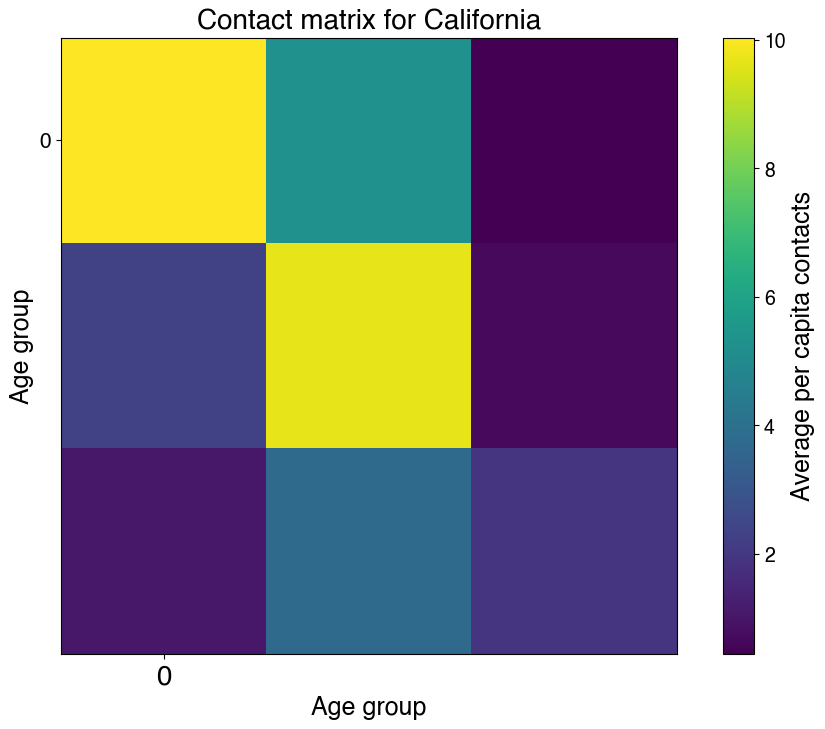

In [200]:
flag_log = False 

pt.plot_contact(cg_contact, id_state=id_state, flag_log=flag_log)

### Symmetry

As expected, $M_{i'j'}'\neq M_{j'i'}'$:

In [201]:
cg_contact == cg_contact.T

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

But the coarse-graining procedure, properly done, still preseves reciprocity of contacts: $M_{i'j'}'N_{i'}=M_{j'i'}N_{j'}$

In [202]:
ut.check_symmetry_condition(cg_contact, cg_population)

True

Very good.

### Number of contacts

The average number of contacts yields eventually:

In [203]:
print(np.sum(cg_contact * cg_population[:, np.newaxis]) / np.sum(cg_population))

12.824570382250414


### Epidemiological quantities

What we do observe, though, is a slight variation in the maximum eigenvalue (and consequently in the transmission rate given $R_0$)

In [204]:
max_eigenvalue = np.max(np.linalg.eigvals(cg_contact))
print(max_eigenvalue)

13.575844144474107


In [205]:
R0 = 1.2
decay_rate = 0.1
transmission_rate = R0 * decay_rate / max_eigenvalue

print(transmission_rate)

0.008839229349052643


Now, what happens with the force of infection in the coarse-grained model?

In [206]:
infected_fraction = 0.0001
infected_fraction_group = np.full(len(cg_contact), infected_fraction)

np.sum(infected_fraction_group * cg_population)

np.float64(57.83120000000001)

In [207]:
foi_group = np.sum(cg_contact * infected_fraction_group[:, np.newaxis], axis=1)
print(foi_group)


[0.00157846 0.0012671  0.00067112]


In [208]:
print(np.mean(foi_group))

0.001172224030967998


If you recall the FoI computed for the equivalent simulation in the 85-age groups model, you'll see they are pretty close.

Now, let us fix the number of infected individuals in each group (the same for every group). Recall now that we have only 3 age groups, or 3 resolved groups (whatever these groups represent). Thus, to make it more comparable against the above scenario, let us add more infected individuals per group and just one.

In [209]:
infected_number = 20
infected_population_group = np.full(len(cg_contact), infected_number)
infected_fraction_group = infected_population_group / cg_population

np.sum(infected_fraction_group * cg_population)


np.float64(60.0)

In [210]:
foi_group = np.sum(cg_contact * infected_fraction_group[:, np.newaxis], axis=1)
print(foi_group)

[0.00203722 0.00070927 0.00203209]


In [211]:
print(np.mean(foi_group))

0.0015928594499927656


This is still higher but by a few. The number of infected individuals is slightly higher (2 individuals more), but higher differences could be attributed to how the population structure and the contact structure is distributing the epidemiological impact.

## Partitioning population groups

Imagine the following. You have a population with $A$ age groups, but you somehow want to further distinguish between more groups within a given age group. That is, partition the original group(s). For sure, it does need to be necessarily more age groups, it could be any other attribute distinction, whatever. In fact, due to lack of further information, we are going to assume that these newly extended groups behave in the same way as their origin groups. At most, their 'effect' will be proportional to their share in the population. This all sounds too much general and vague so now we are going to particularize to a specific example to give some meaning and usefulness to this.

For the sake of the exercise, let us stick to the coarse-grained matrix but note that this would apply to any situation. 

We have then 3 age groups: underage, adults, and elders. Now, imagine that we want to partition the adult group into those that work onsite (and thus commute) and those that can telework or do remote work. Yes, it is an ideal world where every adult person has a job. Move on. Can we introduce this partition into our model's contact matrix? How so?

Let's start with specifying the fraction of teleworkers in our adult population $f_T$ and obtaining the resulting population array:

In [212]:
fraction_teleworkers = 0.1

number_adults = cg_population[1]
ext_population = np.array([cg_population[0], (1.0 - fraction_teleworkers) * number_adults, fraction_teleworkers * number_adults, cg_population[2]])
print(ext_population)

[154962.  321568.2  35729.8  66052. ]


Now we get the corresponding contact matrix that we are using in this example and 'decapitalize' it. That is, we multiply each row for the corresponding population array element: $M_{ij}*N_i=K_{ij}$ to yield the total number of contacts performed by group $i$ and group $j$. 

In [213]:
cg_contact

array([[10.03407032,  5.30399845,  0.44650325],
       [ 2.3003717 ,  9.6773855 ,  0.69319588],
       [ 1.04752371,  3.74973507,  1.91393706]])

In [214]:
cg_contact * cg_population[:, np.newaxis]

array([[1554899.60417602,  821918.20745529,   69191.03626869],
       [ 821918.20745529, 3457710.48264624,  247677.50089847],
       [  69191.03626869,  247677.50089847,  126419.37083284]])

Some notation before continuing. Subscripts $U$, $A$, $C$, $T$ and $E$ refer respectively to underage, adult, adult commuter, adult teleworker, and elder population groups.

Let us focus on the elements related to the group we want to partition. This involves row 1 (from zero) and column 1 (from zero too) in our program arrays. 

Out of the total number of contacts $K_{ij}$, with $i=A$, $j=U$, that is $K_{AU}$ (10 for the variable), the number of contacts of adults are making with underage. How many of these contacts are being performed by commuters and how many of them by teleworkers? Well, we just simply we do not because originally the contact matrix was not measured accounting for this distinction, we have to make a guess. 

The most general one, and simple, is to assume proportionality. That is, commuters will make contacts proportionally to their share of the adult population ($\propto (1-f_T)$), and so will do commuters ($\propto f_T$).

To clearly specify what the final goal of this exercise is, what we need is to build the elements $M_{Cj}$, $M_{jC}$, $M_{Tj}$, $M_{jT}$ of our extended or partitioned contact matrix, which now will be a $4\times 4$ matrix. These elements shall be given by: 
- $M_{Cj}=K_{Cj}/N_C$, 
- $M_{jC}=K_{jC}/N_j$, 
- $M_{Tj}=K_{Tj}/N_T$, 
- $M_{jT}=K_{jT}/N_j$,
with $j=U,C,T,E$.

The rest of elements not involving $C$ and $T$, that is, underage and elder interactions and self-interactions will be just the same as in the original contact matrix.


From the proportionality assumption when breaking contact number of adults into the commuter and teleworker subdivision, we know that:
- $K_{Cj}=(1-f_T)K_{Aj}$,
- $K_{Tj}=f_TK_{Aj}$, with $j=U,C,T,E$. 

Note that we know $K_{Aj}$ and $K_{jA}$ from the original 3x3 matrix.

Therefore:
- $M_{Cj}=(1-f_T)K_{Aj}/N_C$,
- $M_{jC}=(1-f_T)K_{jA}/N_j$,
- $M_{Tj}=f_TK_{Aj}/N_T$,
- $M_{jT}=f_TK_{Aj}/N_j$, with $j=U,C,T,E$.

The reader will note that in this indexing, we are using the original group adult $A$ and the new partitions $C$ and $T$. Thus, the work is not over yet and we have to see how exactly the contacts of the new partitons relate to the original group. That is: $K_{TA}$ and $K_{CA}$.

- $K_{TA}=f_TK_{AA}=K_{TT}+K_{TC}=f_Tf_TK_{AA}+f_T(1-f_T)K_{AA}$,
- $K_{CA}=(1-f_T)K_{AA}=K_{CT}+K_{CC}=(1-f_T)f_TK_{AA}+(1-f_T)(1-f_T)K_{AA}$.

It can be easily checked that $K_{TA}+K_{CA}=K_{AA}$. 

After this, we finally know $K_{TT}, K_{TC}, K_{CT}, K_{CC}$ as functions of the original $K_{AA}$ and the corresponding teleworker fraction $f_T$. 


To recap, the extended contact matrix will look like this:

$
M' = \begin{bmatrix}
\frac{K_{UU}}{N_U} & \frac{K_{UC}}{N_U} & \frac{K_{UT}}{N_U} & \frac{K_{UE}}{N_U} \\[10pt]
\frac{K_{CU}}{N_C} & \frac{K_{CC}}{N_C} & \frac{K_{CT}}{N_C} & \frac{K_{CE}}{N_C} \\[10pt]
\frac{K_{TU}}{N_T} & \frac{K_{TC}}{N_T} & \frac{K_{TT}}{N_T} & \frac{K_{TE}}{N_T} \\[10pt]
\frac{K_{EU}}{N_E} & \frac{K_{EC}}{N_E} & \frac{K_{ET}}{N_E} & \frac{K_{EE}}{N_E}
\end{bmatrix} =
 \begin{bmatrix}
\frac{K_{UU}}{N_U} & \frac{(1-f_T)K_{UA}}{N_U} & \frac{f_T K_{UA}}{N_U} & \frac{K_{UE}}{N_U} \\[10pt]
\frac{(1-f_T)K_{AU}}{(1-f_T)N_A} & \frac{(1-f_T)(1-f_T)K_{AA}}{(1-f_T)N_A} & \frac{(1-f_T)f_TK_{AA}}{(1-f_T)N_A} & \frac{(1-f_T)K_{AE}}{(1-f_T)N_A} \\[10pt]
\frac{f_TK_{AU}}{f_TN_A} & \frac{f_T(1-f_T)K_{AA}}{f_TN_A} & \frac{f_Tf_TK_{AA}}{f_TN_A} & \frac{f_TK_{AE}}{f_TN_A} \\[10pt]
\frac{K_{EU}}{N_E} & \frac{(1-f_T)K_{EA}}{N_E} & \frac{f_TK_{EA}}{N_E} & \frac{K_{EE}}{N_E}
\end{bmatrix}=
\begin{bmatrix}
M_{UU} & (1-f_T)M_{UA} & f_T M_{UA} & M_{UE} \\[10pt]
M_{AU} & (1-f_T)M_{AA} & f_TM_{AA} & M_{AE} \\[10pt]
M_{AU} & (1-f_T)M_{AA} & f_TM_{AA} & M_{AE} \\[10pt]
M_{EU} & (1-f_T)M_{EA} & f_TM_{EA} & M_{EE}
\end{bmatrix}
$


Now let us build this extended matrix computationally from the coarse-grained matrix for California used previously.

In [215]:
ext_contact = np.array([
    [cg_contact[0, 0], (1.0 - fraction_teleworkers) * cg_contact[0, 1], fraction_teleworkers * cg_contact[0, 1], cg_contact[0, 2]],
    [cg_contact[1, 0], (1.0 - fraction_teleworkers) * cg_contact[1, 1], fraction_teleworkers * cg_contact[1, 1], cg_contact[1, 2]],
    [cg_contact[1, 0], (1.0 - fraction_teleworkers) * cg_contact[1, 1], fraction_teleworkers * cg_contact[1, 1], cg_contact[1, 2]],
    [cg_contact[2, 0], (1.0 - fraction_teleworkers) * cg_contact[2, 1], fraction_teleworkers * cg_contact[2, 1], cg_contact[2, 2]]
])

ext_contact

array([[10.03407032,  4.7735986 ,  0.53039984,  0.44650325],
       [ 2.3003717 ,  8.70964695,  0.96773855,  0.69319588],
       [ 2.3003717 ,  8.70964695,  0.96773855,  0.69319588],
       [ 1.04752371,  3.37476156,  0.37497351,  1.91393706]])

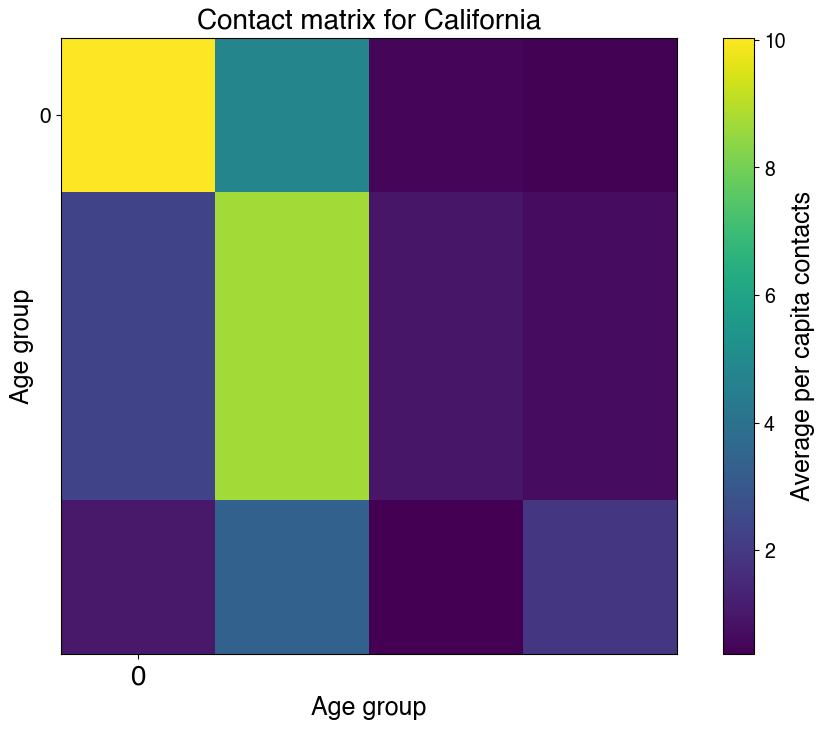

In [216]:
flag_log = False 

pt.plot_contact(ext_contact, id_state=id_state, flag_log=flag_log)

The symmetry is conserved:

In [217]:
ut.check_symmetry_condition(ext_contact, ext_population)

True

The total number of contacts matrix is:

In [218]:
print(ext_contact * ext_population[:, np.newaxis])

[[1554899.60417602  739726.38670976   82191.82074553   69191.03626869]
 [ 739726.38670976 2800745.49094345  311193.94343816  222909.75080862]
 [  82191.82074553  311193.94343816   34577.10482646   24767.75008985]
 [  69191.03626869  222909.75080862   24767.75008985  126419.37083284]]


The system's average number of contacts is:

In [219]:
print(np.sum(ext_contact * ext_population[:, np.newaxis]) / np.sum(ext_population))

12.824570382250414


Let us compute the maximum eigenvalue:

In [220]:
max_eigenvalue = np.max(np.linalg.eigvals(ext_contact))
print(max_eigenvalue)

13.575844144474118


In [221]:
R0 = 1.2
decay_rate = 0.1
transmission_rate = R0 * decay_rate / max_eigenvalue

print(transmission_rate)

0.008839229349052636


In [222]:
infected_fraction = 0.0001
infected_fraction_group = np.full(len(ext_contact), infected_fraction)

np.sum(infected_fraction_group * ext_population)

np.float64(57.83120000000001)

In [223]:
foi_group = np.sum(ext_contact * infected_fraction_group[:, np.newaxis], axis=1)
print(foi_group)

[0.00157846 0.0012671  0.0012671  0.00067112]


In [224]:
print(np.mean(foi_group))

0.0011959418500456283


In [225]:
infected_number = 15
infected_population_group = np.full(len(ext_contact), infected_number)
infected_fraction_group = infected_population_group / ext_population

np.sum(infected_fraction_group * ext_population)

np.float64(60.0)

In [226]:
foi_group = np.sum(ext_contact * infected_fraction_group[:, np.newaxis], axis=1)
print(foi_group)

[0.00152791 0.00059105 0.00531949 0.00152407]


In [227]:
print(np.mean(foi_group))

0.002240632176437452


## Introducing a social-distancing intervention

In [228]:
npi_contact = np.array([
    [cg_contact[0, 0], (1.0 - fraction_teleworkers) * cg_contact[0, 1], 0.0, cg_contact[0, 2]],
    [cg_contact[1, 0], (1.0 - fraction_teleworkers) * cg_contact[1, 1], 0.0, cg_contact[1, 2]],
    [0.0, 0.0, 0.0, 0.0],
    [cg_contact[2, 0], (1.0 - fraction_teleworkers) * cg_contact[2, 1], 0.0, cg_contact[2, 2]]
])

npi_contact

array([[10.03407032,  4.7735986 ,  0.        ,  0.44650325],
       [ 2.3003717 ,  8.70964695,  0.        ,  0.69319588],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.04752371,  3.37476156,  0.        ,  1.91393706]])

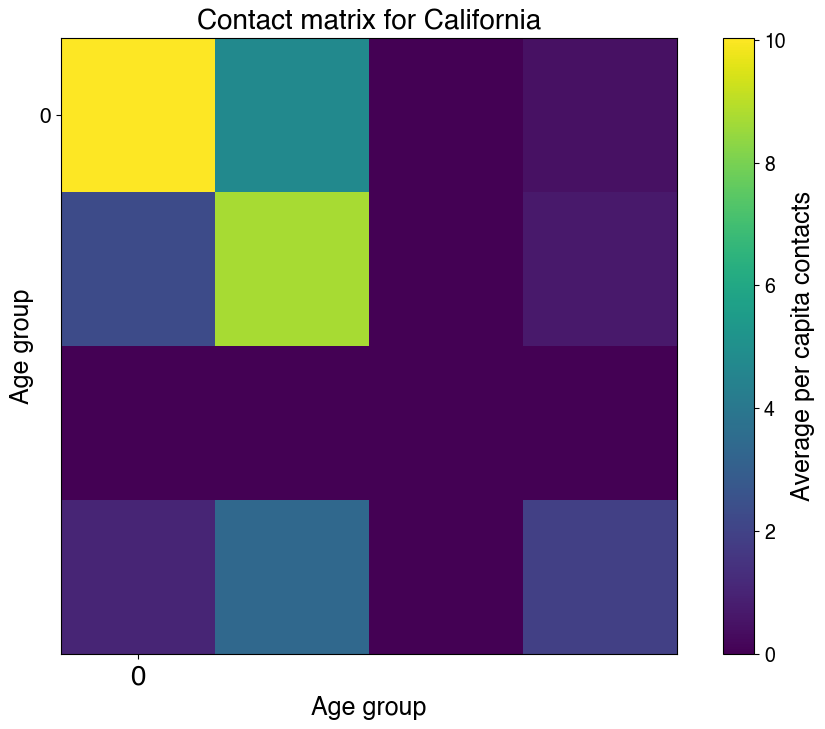

In [230]:
flag_log = False 

pt.plot_contact(npi_contact, id_state=id_state, flag_log=flag_log)

In [231]:
ut.check_symmetry_condition(npi_contact, ext_population)

True

In [232]:
print(npi_contact * ext_population[:, np.newaxis])

[[1554899.60417602  739726.38670976       0.           69191.03626869]
 [ 739726.38670976 2800745.49094345       0.          222909.75080862]
 [      0.               0.               0.               0.        ]
 [  69191.03626869  222909.75080862       0.          126419.37083284]]


In [233]:
print(np.sum(npi_contact * ext_population[:, np.newaxis]) / np.sum(ext_population))

11.318663305493338


In [234]:
max_eigenvalue = np.max(np.linalg.eigvals(npi_contact))
print(max_eigenvalue)

12.95603536864373


In [235]:
R0 = 1.2
decay_rate = 0.1
transmission_rate = R0 * decay_rate / max_eigenvalue

print(transmission_rate)

0.009262092653005923


In [236]:
infected_fraction = 0.0001
infected_fraction_group = np.full(len(npi_contact), infected_fraction)

np.sum(infected_fraction_group * ext_population)

np.float64(57.83120000000001)

In [237]:
foi_group = np.sum(npi_contact * infected_fraction_group[:, np.newaxis], axis=1)
print(foi_group)

[0.00152542 0.00117032 0.         0.00063362]


In [239]:
print(np.mean(foi_group))

0.0008323402256917521


In [240]:
infected_number = 15
infected_population_group = np.full(len(npi_contact), infected_number)
infected_fraction_group = infected_population_group / ext_population

np.sum(infected_fraction_group * ext_population)

np.float64(60.0)

In [241]:
foi_group = np.sum(npi_contact * infected_fraction_group[:, np.newaxis], axis=1)
print(foi_group)

[0.00147657 0.00054591 0.         0.00143892]


In [242]:
print(np.mean(foi_group))

0.0008653504784811393
